My error:
-26.110000000000014
W hat of complete data :
[123.79007528  43.75629817]
Error matrix
[[ 108.59655769]
 [ -41.40344231]
 [ -38.50010056]
 [ -34.50010056]
 [  65.59655769]
 [-156.37824964]
 [  65.59655769]
 [ 114.32766318]
 [   2.54617234]
 [  80.86545219]
 [ -23.62195147]
 [-134.48544799]
 [-136.66822436]
 [  19.62175036]
 [  87.73948882]
 [  14.84025952]
 [ 132.59655769]
 [  78.1343467 ]
 [ -53.37824964]
 [ 113.57136501]
 [ -73.89084598]
 [ 189.32766318]
 [   7.37804853]
 [ -54.13702626]
 [  38.64694303]
 [ -49.91603865]
 [ -48.8656533 ]
 [-442.09238737]
 [  94.89064487]
 [-191.40344231]
 [ -28.8656533 ]
 [   9.84025952]
 [  26.84025952]
 [-287.40344231]
 [   5.033576  ]
 [  69.81506684]
 [  50.84025952]
 [ -98.91603865]
 [ -46.62195147]
 [-327.40344231]
 [ -36.37824964]
 [ 160.08396135]
 [ 143.57136501]
 [ 152.35285585]
 [  51.32766318]
 [-117.69752949]
 [ 538.54617234]]


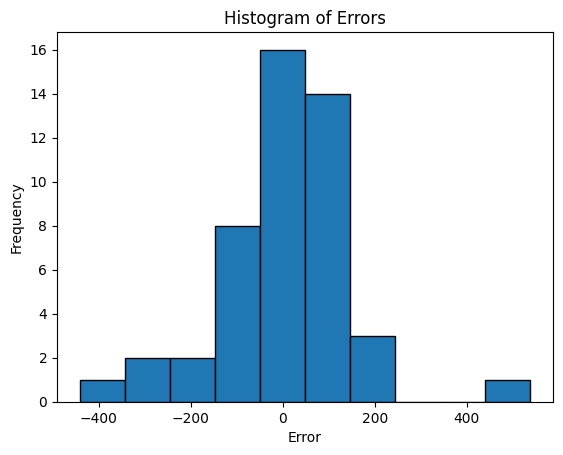

[[3.77440301e-11 6.74845069e-10]]
Students Travel with road only:
    Location Name  Time to Reach (hr)  Distance (km)  Train Only  Road Only  \
12         Bhilai                0.50            9.0         0.0        1.0   
22     Hyderabad                13.00          700.0         0.0        1.0   
23  Sambalpur(OD)                5.47          309.0         0.0        1.0   
28       Jalgaon                11.00          700.0         0.0        1.0   

    Train+Road  
12         0.0  
22         0.0  
23         0.0  
28         0.0  
W hat , time and distance vector (Road Only):
(array([-11.06834871,  58.80124774]), array([[ 1.  ,  0.5 ],
       [ 1.  , 13.  ],
       [ 1.  ,  5.47],
       [ 1.  , 11.  ]]), array([  9., 700., 309., 700.]))
W hat , time and distance vector (Train Only):
(array([-88.14777105,  57.30242157]), array([[ 1., 18.],
       [ 1., 18.],
       [ 1., 21.],
       [ 1., 26.],
       [ 1., 15.],
       [ 1., 13.],
       [ 1., 18.],
       [ 1., 12.],
     

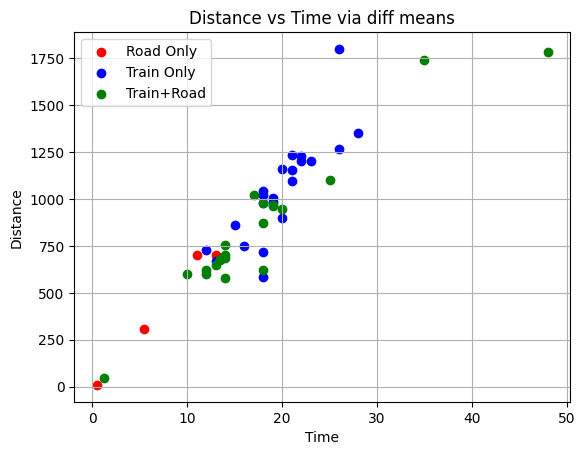

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("/content/DIstanceTimeDataset - StudentsHomeTownDistance (1).csv")
columns=["Location Name","Time to Reach (hr)","Distance (km)","Train Only","Road Only","Train+Road"]
filter_data=data[columns]
filter_data=filter_data.dropna()

location_count=filter_data["Location Name"].value_counts()
# print(location_count)
# matrix of time[1,time]

def create_w(A,B):

  # arr[1,A]
  one=np.ones(len(A))
  A=np.array([one,A])
  # transpose of A
  A=np.transpose(A)
  # print(A)

  # matrix of distance[1,distance]

  w=np.dot(np.linalg.inv(np.dot(np.transpose(A),A)),np.dot(np.transpose(A),B))
  return w,A,B


# My error (Ranchi)
e=620-(139.71+(12)*42.2)
print(f"My error:\n{e}")
A=np.array(filter_data["Time to Reach (hr)"])
B=np.array(filter_data["Distance (km)"])
w,A,B=create_w(A,B)
print(f"W hat of complete data :\n{w}")

# error matrix
print("Error matrix")
err=B-np.dot(A,w)
err=err.reshape(len(err),1)
print(err)

# Histogram of errors
plt.hist(err,bins=10,edgecolor="black")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of Errors")
plt.show()

# verify that the error vector perp to any vector in col(A)
print(np.dot(err.T,A))

# Matrix of distance only if road only ==1
road_data=(filter_data[filter_data["Road Only"]==1])
print(f"Students Travel with road only:\n{road_data}")

# diatnce matrix of road only
C=np.array(road_data["Distance (km)"])
D=np.array(road_data["Time to Reach (hr)"])
print(f"W hat , time and distance vector (Road Only):\n{create_w(D,C)}")


# Train data
train_data=(filter_data[filter_data["Train Only"]==1])
E=np.array(train_data["Distance (km)"])
F=np.array(train_data["Time to Reach (hr)"])

print(f"W hat , time and distance vector (Train Only):\n{create_w(F,E)}")

# Both train and road
train_road_data=(filter_data[filter_data["Train+Road"]==1])
G=np.array(train_road_data["Distance (km)"])
H=np.array(train_road_data["Time to Reach (hr)"])


# scatter plot of road data train data and train+road data
plt.scatter(D,C,color="red")
plt.scatter(F,E,color="blue")
plt.scatter(H,G,color="green")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.grid(True)
plt.title("Distance vs Time via diff means")
plt.legend(["Road Only","Train Only","Train+Road"])
plt.show()




# print(filter_data)